**`tf.train`**

+ **`tf.train.Optimizer()`**

In [ ]:
Class Optimizer 的基类，这个类定义了在训练模型时候添加一个操作的API
基本不会直接使用这个类，但是会用到它的子类比如 `tf.trian.GradientDescentOptimizer, AdagradOptimizer, MomentumOptimizer`

+ Base class for optimizers. This class defines the API to add Ops to train a model.
+ You never use this class directly, but instead instantiate one of its subclasses such as `GradientDescentOptimizer`, `AdagradOptimizer`, or `MomentumOptimizer`.

+ `Usage`

```python
# Create an optimizer with the desired parameters.
opt = GradientDescentOptimizer(learning_rate=0.1)
# Add Ops to the graph to minimize a cost by updating a list of variables.
# "cost" is a Tensor, and the list of variables contains tf.Variable
# objects.
opt_op = opt.minimize(cost, var_list=<list of variables>)
```

In [ ]:
tf.train.Optimizer
https://www.tensorflow.org/api_docs/python/tf/train/Optimizer

+ `Method`

```python
apply_gradients(
    grads_and_vars,
    global_step=None,
    name=None
)


compute_gradients(
    loss,
    var_list=None,
    gate_gradients=GATE_OP,
    aggregation_method=None,
    colocate_gradients_with_ops=False,
    grad_loss=None
)

minimize(
    loss,
    global_step=None,
    var_list=None,
    gate_gradients=GATE_OP,
    aggregation_method=None,
    colocate_gradients_with_ops=False,
    name=None,
    grad_loss=None
)

```

```python
apply_gradients(
    grads_and_vars,
    global_step=None,
    name=None
)
```

Apply gradients to variables.

This is the second part of `minimize()`. It returns an `Operation` that applies gradients.


+ Args:
    - `grads_and_vars`: List of (gradient, variable) pairs as returned by `compute_gradients()`.
    - `global_step`: Optional `Variable` to increment by one after the variables have been updated.
    - `name`: Optional name for the returned operation. Default to the name passed to the `Optimizer` constructor.

- Returns:
    - An `Operation` that applies the specified gradients. If `global_step` was not None, that operation also increments `global_step`.

```python
compute_gradients(
    loss,
    var_list=None,
    gate_gradients=GATE_OP,
    aggregation_method=None,
    colocate_gradients_with_ops=False,
    grad_loss=None
)
```

Compute gradients of loss for the variables in var_list.

This is the first part of minimize(). It returns a list of (gradient, variable) pairs where "gradient" is the gradient for "variable". Note that "gradient" can be a Tensor, an IndexedSlices, or None if there is no gradient for the given variable.
Args:

    loss: A Tensor containing the value to minimize or a callable taking no arguments which returns the value to minimize. When eager execution is enabled it must be a callable.
    var_list: Optional list or tuple of tf.Variable to update to minimize loss. Defaults to the list of variables collected in the graph under the key GraphKeys.TRAINABLE_VARIABLES.
    gate_gradients: How to gate the computation of gradients. Can be GATE_NONE, GATE_OP, or GATE_GRAPH.
    aggregation_method: Specifies the method used to combine gradient terms. Valid values are defined in the class AggregationMethod.
    colocate_gradients_with_ops: If True, try colocating gradients with the corresponding op.
    grad_loss: Optional. A Tensor holding the gradient computed for loss.

Returns:

A list of (gradient, variable) pairs. Variable is always present, but gradient can be None.

```python
minimize(
    loss,
    global_step=None,
    var_list=None,
    gate_gradients=GATE_OP,
    aggregation_method=None,
    colocate_gradients_with_ops=False,
    name=None,
    grad_loss=None
)

```

Add operations to minimize loss by updating var_list.

This method simply combines calls compute_gradients() and apply_gradients(). If you want to process the gradient before applying them call compute_gradients() and apply_gradients() explicitly instead of using this function.
Args:

    loss: A Tensor containing the value to minimize.
    global_step: Optional Variable to increment by one after the variables have been updated.
    var_list: Optional list or tuple of Variable objects to update to minimize loss. Defaults to the list of variables collected in the graph under the key GraphKeys.TRAINABLE_VARIABLES.
    gate_gradients: How to gate the computation of gradients. Can be GATE_NONE, GATE_OP, or GATE_GRAPH.
    aggregation_method: Specifies the method used to combine gradient terms. Valid values are defined in the class AggregationMethod.
    colocate_gradients_with_ops: If True, try colocating gradients with the corresponding op.
    name: Optional name for the returned operation.
    grad_loss: Optional. A Tensor holding the gradient computed for loss.

Returns:

An Operation that updates the variables in var_list. If global_step was not None, that operation also increments global_step.

In [ ]:
https://blog.csdn.net/lenbow/article/details/52218551
该操作不仅可以优化更新训练的模型参数，也可以为`全局步骤 / global step`计数

In [ ]:
global_step = tf.Variable(0, name='global_step', trainable=False)
train_op = optimizer.minimize(loss, global_step=global_step)

In [ ]:
返回一个优化更新后的`var_list`
如果`global_step`非`None`，该操作还会为`global_step`做自增操作

**`梯度修剪`**
+ tf.train.Optimizer().apply_gradients()
+ tf.train.Optimizer().compute_gradients()

梯度修剪主要避免训练造成的 `梯度爆炸` & `梯度消失` 问题

In [ ]:
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)
在调用`minimize()`方法时，底层实际做了两件事：
    计算所有`trainable_variable`的`gradient`
    将`gradient`作用于`trainable_variable`
在调用`sess.run(train_op)`时，会对`trainable_variable`进行更新

In [ ]:
### Processing gradients before applying them.

Calling `minimize()` takes care of both computing the gradients and
applying them to the variables.  If you want to process the gradients
before applying them you can instead use the optimizer in three steps:

1.  Compute the gradients with `compute_gradients()`.
2.  Process the gradients as you wish.
3.  Apply the processed gradients with `apply_gradients()`.



In [ ]:

Example:

```python
# Create an optimizer.
opt = GradientDescentOptimizer(learning_rate=0.1)

# Compute the gradients for a list of variables.
grads_and_vars = opt.compute_gradients(loss, <list of variables>)

# grads_and_vars is a list of tuples (gradient, variable).  Do whatever you
# need to the 'gradient' part, for example cap them, etc.
capped_grads_and_vars = [(MyCapper(gv[0]), gv[1]) for gv in grads_and_vars]

# Ask the optimizer to apply the capped gradients.
opt.apply_gradients(capped_grads_and_vars)
```

```python
compute_gradients(
    loss,
    var_list=None,
    gate_gradients=GATE_OP,
    aggregation_method=None,
    colocate_gradients_with_ops=False,
    grad_loss=None
)
```

In [ ]:
计算`loss`中可训练的`var_list`中的梯度
相当于`minimize()`的第一步，返回 `(gradient, variable)` 对的 list

Compute gradients of `loss` for the variables in `var_list`.

This is the first part of minimize(). It returns a list of (gradient, variable) pairs where "gradient" is the gradient for "variable". Note that "gradient" can be a Tensor, an IndexedSlices, or None if there is no gradient for the given variable.
Args:

    loss: A Tensor containing the value to minimize or a callable taking no arguments which returns the value to minimize. When eager execution is enabled it must be a callable.
    var_list: Optional list or tuple of tf.Variable to update to minimize loss. Defaults to the list of variables collected in the graph under the key GraphKeys.TRAINABLE_VARIABLES.
    gate_gradients: How to gate the computation of gradients. Can be GATE_NONE, GATE_OP, or GATE_GRAPH.
    aggregation_method: Specifies the method used to combine gradient terms. Valid values are defined in the class AggregationMethod.
    colocate_gradients_with_ops: If True, try colocating gradients with the corresponding op.
    grad_loss: Optional. A Tensor holding the gradient computed for loss.

Returns:

A list of (gradient, variable) pairs. Variable is always present, but gradient can be None.

```python
apply_gradients(
    grads_and_vars,
    global_step=None,
    name=None
)
```

将`gradient`作用于`variables`
`minimize()`的第二部分，返回一个执行梯度更新的`Operation`

Apply gradients to variables.

This is the second part of `minimize()`. It returns an `Operation` that applies gradients.


+ Args:
    - `grads_and_vars`: List of (gradient, variable) pairs as returned by `compute_gradients()`.
    - `global_step`: Optional `Variable` to increment by one after the variables have been updated.
    - `name`: Optional name for the returned operation. Default to the name passed to the `Optimizer` constructor.

- Returns:
    - An `Operation` that applies the specified gradients. If `global_step` was not None, that operation also increments `global_step`.

In [ ]:
`Examples`

```python
# Create an optimizer with the desired parameters.
opt = GradientDescentOptimizer(learning_rate=0.1)
# Add Ops to the graph to minimize a cost by updating a list of variables.
# "cost" is a Tensor, and the list of variables contains tf.Variable
# objects.
opt_op = opt.minimize(cost, var_list=<list of variables>)

```

```python
# Create an optimizer.
opt = GradientDescentOptimizer(learning_rate=0.1)

# Compute the gradients for a list of variables.
grads_and_vars = opt.compute_gradients(loss, <list of variables>)

# grads_and_vars is a list of tuples (gradient, variable).  Do whatever you
# need to the 'gradient' part, for example cap them, etc.
capped_grads_and_vars = [(MyCapper(gv[0]), gv[1]) for gv in grads_and_vars]

# Ask the optimizer to apply the capped gradients.
opt.apply_gradients(capped_grads_and_vars)
```

**`tf.train.AdamOptimizer`**
**`tf.train.ExponentialMovingAverage`**
**`tf.train.GradientDescentOptimizer`**
**`tf.train.MomentumOptimizer`**
**`tf.train.Optimizer`**
**`tf.train.RMSPropOptimizer`**
**`tf.train.XXX`**

In [ ]:
tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08, use_locking=False, name='Adam')

Construct a new Adam optimizer.

Initialization:

$$m_0 := 0  ext{(Initialize initial 1st moment vector)}$$
$$v_0 := 0  ext{(Initialize initial 2nd moment vector)}$$
$$t := 0    ext{(Initialize timestep)}$$

The update rule for `variable` with gradient `g` uses an optimization
described at the end of section2 of the paper:

$$t := t + 1$$
$$lr_t :=   ext{learning\_rate} * \sqrt{1 - beta_2^t} / (1 - beta_1^t)$$

$$m_t := beta_1 * m_{t-1} + (1 - beta_1) * g$$
$$v_t := beta_2 * v_{t-1} + (1 - beta_2) * g * g$$
$$variable := variable - lr_t * m_t / (\sqrt{v_t} + \epsilon)$$

The default value of 1e-8 for epsilon might not be a good default in
general. For example, when training an Inception network on ImageNet a
current good choice is 1.0 or 0.1. Note that since AdamOptimizer uses the
formulation just before Section 2.1 of the Kingma and Ba paper rather than
the formulation in Algorithm 1, the "epsilon" referred to here is "epsilon
hat" in the paper.

The sparse implementation of this algorithm (used when the gradient is an
IndexedSlices object, typically because of `tf.gather` or an embedding
lookup in the forward pass) does apply momentum to variable slices even if
they were not used in the forward pass (meaning they have a gradient equal
to zero). Momentum decay (beta1) is also applied to the entire momentum
accumulator. This means that the sparse behavior is equivalent to the dense
behavior (in contrast to some momentum implementations which ignore momentum
unless a variable slice was actually used).

Args:
  learning_rate: A Tensor or a floating point value.  The learning rate.
  beta1: A float value or a constant float tensor.
    The exponential decay rate for the 1st moment estimates.
  beta2: A float value or a constant float tensor.
    The exponential decay rate for the 2nd moment estimates.
  epsilon: A small constant for numerical stability. This epsilon is
    "epsilon hat" in the Kingma and Ba paper (in the formula just before
    Section 2.1), not the epsilon in Algorithm 1 of the paper.
  use_locking: If True use locks for update operations.
  name: Optional name for the operations created when applying gradients.
    Defaults to "Adam".

@compatibility(eager)
When eager execution is enabled, `learning_rate`, `beta1`, `beta2`, and
`epsilon` can each be a callable that takes no arguments and returns the
actual value to use. This can be useful for changing these values across
different invocations of optimizer functions.
@end_compatibility

In [ ]:
相比较于 SGD 算法而言
1. 不容易陷入局部最优点
2. 速度更快

learning_rate: A Tensor or a floating point value. The learning rate.
beta1: A float value or a constant float tensor. The exponential decay rate for the 1st moment estimates.
beta2: A float value or a constant float tensor. The exponential decay rate for the 2nd moment estimates.
epsilon: A small constant for numerical stability. This epsilon is "epsilon hat" in the Kingma and Ba paper (in the formula just before Section 2.1), not the epsilon in Algorithm 1 of the paper.
use_locking: If True use locks for update operations.
name: Optional name for the operations created when applying gradients. Defaults to "Adam".·

In [ ]:
# x = tf.placeholder(tf.float32)
x = tf.Variable(tf.truncated_normal([1]), name="x")
goal = tf.pow(x-3,2, name="goal")


In [ ]:
with tf.Session() as sess:
    x.initializer.run()
    print x.eval()
    print goal.eval()

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_step = optimizer.minimize(goal)

In [ ]:
def train():
    with tf.Session() as sess:
        x.initializer.run()
        for i in range(10):
            print "x: ", x.eval()
            train_step.run()
            print "goal: ",goal.eval()    
train()

In [ ]:
y = tf.Variable(tf.truncated_normal([1]))
max_goal = tf.sin(y)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# train_step = optimizer.minimize(tf.negative(max_goal))
train_step = optimizer.minimize(-1 * max_goal

In [ ]:
with tf.Session() as sess:
    y.initializer.run()
    for i in range(10):
        print "y: ", y.eval()
        train_step.run()
        print "max_goal: ",max_goal.eval()

In [ ]:
# compute_gradients 返回的是：A list of (gradient, variable) pairs
gra_and_var = optimizer.compute_gradients(goal)
train_step = optimizer.apply_gradients(gra_and_var)
train()

In [ ]:
clip_by_global_norm:修正梯度值
    用于控制梯度爆炸的问题。梯度爆炸和梯度弥散的原因一样，都是因为链式法则求导的关系，导致梯度的指数级衰减。为了避免梯度爆炸，需要对梯度进行修剪。
In [9]:

gradients, vriables = zip(*optimizer.compute_gradients(goal))
gradients, _ = tf.clip_by_global_norm(gradients, 1.25)
train_step = optimizer.apply_gradients(zip(gradients, vriables))
train()



In [ ]:

exponential_decay 加入学习率衰减：
In [10]:

# global_step 记录当前是第几个batch
global_step = tf.Variable(0)
learning_rate = tf.train.exponential_decay(
    3.0, global_step, 3, 0.3, staircase=True)
optimizer2 = tf.train.GradientDescentOptimizer(learning_rate)
gradients, vriables = zip(*optimizer2.compute_gradients(goal))
gradients, _ = tf.clip_by_global_norm(gradients, 1.25)
train_step = optimizer2.apply_gradients(zip(gradients, vriables), 
                                       global_step=global_step)
with tf.Session() as sess:
        global_step.initializer.run()
        x.initializer.run()
        for i in range(10):
            print "x: ", x.eval()
            train_step.run()
            print "goal: ",goal.eval()



# tf.gradient & tf.stop_gradient

tf.gradients(ys, xs, grad_ys=None, name='gradients', stop_gradients=None)

In [ ]:
Constructs symbolic derivatives of sum of `ys` w.r.t. x in `xs`.

`ys` and `xs` are each a `Tensor` or a list of tensors.  `grad_ys`
is a list of `Tensor`, holding the gradients received by the
`ys`. The list must be the same length as `ys`.

`gradients()` adds ops to the graph to output the derivatives of `ys` with
respect to `xs`.  It returns a list of `Tensor` of length `len(xs)` where
each tensor is the `sum(dy/dx)` for y in `ys`.

In [ ]:
`grad_ys` is a list of tensors of the same length as `ys` that holds
the initial gradients for each y in `ys`.  When `grad_ys` is None,
we fill in a tensor of '1's of the shape of y for each y in `ys`.  A
user can provide their own initial `grad_ys` to compute the
derivatives using a different initial gradient for each y (e.g., if
one wanted to weight the gradient differently for each value in
each y).

In [ ]:
`stop_gradients` is a `Tensor` or a list of tensors to be considered constant
with respect to all `xs`. These tensors will not be backpropagated through,
as though they had been explicitly disconnected using `stop_gradient`.  Among
other things, this allows computation of partial derivatives as opposed to
total derivatives. For example:

```python
a = tf.constant(0.)
b = 2 * a
g = tf.gradients(a + b, [a, b], stop_gradients=[a, b])
```

Here the partial derivatives `g` evaluate to `[1.0, 1.0]`, compared to the
total derivatives `tf.gradients(a + b, [a, b])`, which take into account the
influence of `a` on `b` and evaluate to `[3.0, 1.0]`.  Note that the above is
equivalent to:

```python
a = tf.stop_gradient(tf.constant(0.))
b = tf.stop_gradient(2 * a)
g = tf.gradients(a + b, [a, b])
```

`stop_gradients` provides a way of stopping gradient after the graph has
already been constructed, as compared to `tf.stop_gradient` which is used
during graph construction.  When the two approaches are combined,
backpropagation stops at both `tf.stop_gradient` nodes and nodes in
`stop_gradients`, whichever is encountered first.

All integer tensors are considered constant with respect to all `xs`, as if
they were included in `stop_gradients`.

In [ ]:
ys: A `Tensor` or list of tensors to be differentiated.
xs: A `Tensor` or list of tensors to be used for differentiation.
grad_ys: Optional. A `Tensor` or list of tensors the same size as
    `ys` and holding the gradients computed for each y in `ys`.
stop_gradients: Optional. A `Tensor` or list of tensors not to differentiate
    through.

In [ ]:
Returns:
  A list of `sum(dy/dx)` for each x in `xs`.

In [ ]:
tf.gradients(ys, xs)
注意，xs 中的每一个元素，必须要与 ys 相关，不相关的话，会报错
w1 = tf.Variable([[1,2]])
w2 = tf.Variable([[3,4]])
res = tf.matmul(w1, [[2],[1]])
grads = tf.gradients(res,[w1,w2])

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    re = sess.run(grads)
    print(re)

In [ ]:
import tensorflow as tf
w1 = tf.get_variable('w1', shape=[3])
w2 = tf.get_variable('w2', shape=[3])
w3 = tf.get_variable('w3', shape=[3])
w4 = tf.get_variable('w4', shape=[3])

z1 = w1 + w2+ w3
z2 = w3 + w4

grads = tf.gradients([z1, z2], [w1, w2, w3, w4], 
                     grad_ys=[tf.convert_to_tensor([2.,2.,3.]), 
                              tf.convert_to_tensor([3.,2.,4.])])

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(sess.run(grads))

In [ ]:
tf.stop_gradient(input, name=None)

In [ ]:
Stops gradient computation.

When executed in a graph, this op outputs its input tensor as-is.

When building ops to compute gradients, this op prevents the contribution of
its inputs to be taken into account.  Normally, the gradient generator adds ops
to a graph to compute the derivatives of a specified 'loss' by recursively
finding out inputs that contributed to its computation.  If you insert this op
in the graph it inputs are masked from the gradient generator.  They are not
taken into account for computing gradients.

This is useful any time you want to compute a value with TensorFlow but need
to pretend that the value was a constant. Some examples include:

*  The *EM* algorithm where the *M-step* should not involve backpropagation
   through the output of the *E-step*.
*  Contrastive divergence training of Boltzmann machines where, when
   differentiating the energy function, the training must not backpropagate
   through the graph that generated the samples from the model.
*  Adversarial training, where no backprop should happen through the adversarial
   example generation process.

Args:
  input: A `Tensor`.
  name: A name for the operation (optional).

In [ ]:
阻挡节点 Backpropagation 的梯度

In [2]:
import tensorflow as tf
w1 = tf.Variable(2.0)
w2 = tf.Variable(2.0)
a = tf.multiply(w1, 3.0)
a_stoped = tf.stop_gradient(a)

# b=w1*3.0*w2
b = tf.multiply(a_stoped, w2)
gradients = tf.gradients(b, xs=[w1, w2])
print(gradients)

[None, <tf.Tensor 'gradients/Mul_1_grad/Mul_1:0' shape=() dtype=float32>]


In [ ]:
一个节点被stop之后，这个节点上的梯度，就无法再向前BP了
由于w1变量的梯度只能来自a节点，所以，计算梯度返回是None

In [ ]:
a = tf.Variable(1.0)
b = tf.Variable(1.0)
c = tf.add(a, b)
c_stoped = tf.stop_gradient(c)
d = tf.add(a, b)
e = tf.add(c_stoped, d)
gradients = tf.gradients(e, xs=[a, b])

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(sess.run(gradients)) #输出 [1.0, 1.0]

In [ ]:
虽然c节点被stop了，但是a,b还有从d传回的梯度，所以还是可以输出梯度值的

In [ ]:
# 高阶导数

In [6]:
with tf.device('/cpu:0'):
    a = tf.constant(1.)
    b = tf.pow(a, 2)
    grad = tf.gradients(ys=b, xs=a) # 一阶导
    print(grad[0])
    grad_2 = tf.gradients(ys=grad[0], xs=a) # 二阶导
    print(grad_2)
    grad_3 = tf.gradients(ys=grad_2[0], xs=a) # 三阶导
    print(grad_3)
    
with tf.Session() as sess:
    print(sess.run(grad_3))
    print(sess.run(grad_2))

Tensor("gradients_10/Pow_3_grad/Reshape:0", shape=(), dtype=float32, device=/device:CPU:0)
[<tf.Tensor 'gradients_11/gradients_10/Pow_3_grad/Pow_grad/Reshape:0' shape=() dtype=float32>]
[<tf.Tensor 'gradients_12/gradients_11/gradients_10/Pow_3_grad/Pow_grad/Pow_grad/Reshape:0' shape=() dtype=float32>]
[0.0]
[2.0]


In [ ]:
tf.square

In [ ]:
tf.split

In [ ]:
tf.matmul
將a,b兩個矩陣相乘，如果需要事先轉置的話，可以把個別的選項調成True，如果矩陣裏面包括很多0的話，可以調用spare=True轉為更有效率的演算法

In [ ]:
tf.mul
實現兩個矩陣點乘，兩個矩陣必須要相同維度

In [ ]:
tf.one_hot

In [ ]:
tf.Variable.eval(session=None)

函數解說：顯示出某個tensor變數的值

In [ ]:
tf.Variable.assign(value, use_locking=False)

函數解說：將tensor中的變數用value值取代，這function可以用來實現double DQN

In [ ]:
tf.Variable.assign_sub(delta, use_locking=False)

函數解說：將tensor中的變數-delta值，然後取代

In [1]:
import tensorflow as tf

# Active Function

In [ ]:
tf.nn.relu
tf.nn.relu6
tf.nn.relu_layer
tf.nn.sigmoid
tf.nn.tanh
tf.nn.softmax
tf.nn.softplus
tf.nn.softsign

# Cross Entropy

In [ ]:
刻画两个概率分布之间的距离

```python
cross_entropy = -tf.reduce_mean(
    y_label * tf.log(
        tf.clip_by_value(y_predict, 1e-10, 1.0)
    )
)
```

In [ ]:
对应元素相乘 *
矩阵乘法 tf.matmul


In [ ]:
from numpy.random import RandomState
rdm = RandomState(1)

y_  = tf.constant(rdm.rand(1,10))
y = np.array([0.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0])

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=y_)
with tf.Session() as sess:
    loss = sess.run(cross_entropy)
    print(loss)

y_softmax = tf.nn.softmax(logits=y_)
cross_entropy_v1 = -tf.reduce_sum(y * tf.log(y_softmax))

with tf.Session() as sess:
    loss = sess.run(cross_entropy_v1)
    print(loss)

In [ ]:
logits = tf.constant([[1.0,2.0,3.0],[1.0,2.0,3.0],[1.0,2.0,3.0]])
y  = tf.nn.softmax(logits)
y_ = tf.constant([[0.0,0.0,1.0],[0.0,0.0,1.0],[0.0,0.0,1.0]])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

cross_entropy2 = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_))

with tf.Session() as sess:
    c_e = sess.run(cross_entropy)
    c_e2 = sess.run(cross_entropy2)
    print("step2:cross_entropy result=")
    print(c_e)
    print("Function(softmax_cross_entropy_with_logits) result=")
    print(c_e2)

In [ ]:
Truth = np.array([0,0,1,0])
Pred_logits = np.array([3.5,2.1,7.89,4.4])

loss = tf.nn.softmax_cross_entropy_with_logits(labels=Truth,logits=Pred_logits)
loss2 = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Truth,logits=Pred_logits)
loss3 = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=tf.argmax(Truth),logits=Pred_logits)

with tf.Session() as sess:
    print(sess.run(loss))
    print(sess.run(loss2))
    print(sess.run(loss3))

In [ ]:
cross entropy 一般会与 softmax 一起使用，所以 Tensorflow 对这两个功能进行了统一封装
tf.nn.softmax_cross_entropy_with_logits

In [ ]:
回归问题，常用的损失函数为 MSE mean squared error 均方误差
mse = tf.reduce_mean(tf.square(y_ - y))

In [ ]:
自定义损失函数
loss = tf.reduce_sum(tf.where(tf.greater(v1,v2), (v1-v2) * a, (v2-v1) * b))

In [7]:
v1 = tf.constant([1., 2., 3., 4.])
v2 = tf.constant([4., 3., 2., 1.])
compare = tf.greater(v1, v2)
which = tf.where(compare, v1, v2)

with tf.Session() as sess:
    print(sess.run(compare))
    print(sess.run(which))

[False False  True  True]
[4. 3. 3. 4.]


In [ ]:
# 基本流程
import tensorflow as tf
from numpy.random import RandomState

batch_size=8

w1 = tf.Variable(tf.random_normal([2,3],stddev=1,seed=1))
w2 = tf.Variable(tf.random_normal([3,1],stddev=1,seed=1))

x = tf.placeholder(tf.float32,shape=(None,2),name='x_input')
y_ = tf.placeholder(tf.float32,shape=(None,1),name ='y_input')

a = tf.matmul(x,w1)
y = tf.matmul(a,w2)

#tf.clip_by_value()可以将计算的数值限制在一个范围内（1e-10~1.0）
#y_表示真实值，y表示预测值，定义的是交叉熵损失函数
#对于回归问题，最常用的损失函数是均方误差（MSE）mse = tf.reduce_mean(tf.square(y_-y))
cross_entropy = -tf.reduce_mean(
            y_*tf.log(tf.clip_by_value(y,1e-10,1.0)))
#多分类问题适合softmax+cross_entrpy
#cross_entropy2 = tf.nn.softmax_cross_entropy_with_logits(y,y_)
train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

rdm = RandomState(1)
dataset_size=128
X = rdm.rand(dataset_size,2)
Y = [[int(x1+x2<1)] for (x1,x2) in X]

with tf.Session() as sess:
    init_op = tf.initialize_all_variables()
    sess.run(init_op)
    
    steps = 5000
    for i in range(steps):
        start = (i*batch_size)%dataset_size
        end = min(start+batch_size,dataset_size)
        
        sess.run(train_step,feed_dict = {x:X[start:end],y_:Y[start:end]})
        if i%1000==0:
            total_cross_entropy = sess.run(
                cross_entropy,feed_dict={x:X,y_:Y})
            print("After %d training_step(s) ,cross_entropy on all data is %g"%(i,total_cross_entropy))

In [ ]:
学习率的设置 / 指数衰减法

通过这个函数，可以先使用较大的学习率来快速得到一个比较优的解，然后随着迭代的继续逐步减小学习率，使得模型在训练后期更加稳定

In [ ]:
decay_learning_rate = \
    learning_rate * dacay_rate ^ (global_step / decay_steps)

In [ ]:
decay_learning_rate 为每一轮优化时使用的学习率
decay_steps 为衰减速度

In [ ]:
可以通过设置参数 staircase 选择不同的衰减方法大

In [ ]:
staircase = False
    学习率随迭代轮数变化为连续的
staircase = True
    gloabl_step / decay_step 会被转化为整数
    这使得学习率成为一个阶梯函数 staircase function
    
        在这样的设置下，decay_steps 通常代表完成的使用一便训练数据所需要的迭代轮数
        这个迭代轮数也就是总训练样本数除以每一个 batch 中的训练样本数
        
        这种设置的常用场景就是每完整地过完一遍训练数据，学习率就减小一次
        这可以使得训练数据集中的所有数据对模型训练有相等的作用

In [ ]:
- 学习速率衰减
    tf.train.exponential_decay
- 过拟合 -> 正则化
    tf.contrib.layers.l1_l2_regularizer
    tf.get_collection
    tf.add_to_collection
    tf.add_n
- ExponentialMovingAverage / 滑动平均模型
    tf.train.ExponentialMovingAverage

In [ ]:
**`tf.train.exponential_decay`**

In [ ]:
if False:
    global_step = tf.Variable(0)
    
    # 通过 exponential_decay 函数来生成学习率
    leanring_rate = tf.train.exponential_decay(
        0.1, global_step, decay_steps=100, decay_rate=0.96, staircase=True
    )
    
    # 使用'指数衰减学习率'
    # 在 minimize 函数中传入 global_step, 并将自动更新 global_step 参数
    # 从而使得学习率也得到相应更新
    optimizer = tf.train.GradientDescentOptimizer(leanring_rate)
    learning_step = optimizer.minimize(...my_loss.., global_step=global_step)

In [1]:
import tensorflow as tf

In [ ]:
**`Overfit`**

In [ ]:
当一个模型过为复杂之后，它可以很好地'记忆'每一个训练数据中随机噪声的部分而忘记了要去'学习'训练数据中通用的趋势

In [ ]:
weight = tf.constant([[1.0, -2.0], [-3.0, 4.0]])

with tf.Session() as sess:
    l1 = tf.contrib.layers.l1_regularizer(.5)(weight)
    l2 = tf.contrib.layers.l2_regularizer(.5)(weight)
    l1_l2 = tf.contrib.layers.l1_l2_regularizer(.5, .5)(weight)
    
    print(sess.run(l1))
    print(sess.run(l2))
    print(sess.run(l1_l2))

In [ ]:
```python
w = tf.Variable(tf.random_normal([2,1], stddev=1, seed=1))
y = tf.matmul(x, w)

loss = tf.reduce_mean(tf.square(y_ - y))
reg = tf.contrib.layers.l2_regularizer(lambda)(w)

loss = loss + reg
```

In [ ]:
使用 collection

In [ ]:
def get_weight(shape, lambda):
    reg = tf.contrib.layers.l2_regularizer(lambda)
    
    var = tf.Variable(tf.random_normal(shape), dtype=tf.float32)
    tf.add_to_collection('loss', reg(var))
    
    return var

x  = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None, 1))
batch_size = 8

# 每一层网络中的节点个数
layer_dim = [2, 10, 10, 10, 1]
# layers of NN
n_layers = len(layer_dim)

# 这个变量维护向前传播时最深层的节点，开始的时候就是输入层
cur_layer = x
# 当前层的节点个数
in_dim = layer_dim[0]

# 通过一个循环生成 5 层 FC-nn
for i in range(1, n_layers):
    out_dim = layer_dim[i]
    weight = get_weight([in_dim, out_dim], 0.001)
    bias = tf.Variable(tf.constant(0.1, shape=[out_dim]))
    
    cur_layer = tf.nn.relu(tf.matmul(cur_layer, weight) + bias)
    in_dim = layer_dim[i]
    
mse_loss = tf.reduce_mean(tf.square(y_ - cur_layer))

# 将均方误差加入到'loss'集合中
tf.add_to_collection('loss', mse_loss)

# tf.get_collection 返回一个列表，这个列表是所有这个集合中的元素
loss = tf.add_n(tf.get_collection('loss'))


In [3]:
for i in range(1,5):
    print(i)

1
2
3
4


**`Exponential Moving Average`**

In [ ]:
var = tf.Variable(0, dtype=tf.float32)

# 模拟社交网络迭代轮数, 动态控制衰减率
step = tf.Variable(0, trainable=False)

# 定义一个滑动平均累
ema = tf.train.ExponentialMovingAverage(decay=0.99, num_updates=step)

# 定义一个滑动平均的操作
# 这里需要给定一个列表, 每次执行这个操作时, 列表里的元素都会被更新
maintain_average_op = ema.apply([var])

In [ ]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    print(sess.run([var, ema.average(var)]))

    # 更新v1的滑动平均值，衰减率为min{0.99,(1+step)/(10+step)=0.1}=0.1,
    # 所以v1的滑动平均被更新为0.1*0+0.9*5=4.5
    sess.run(tf.assign(var, 5))
    sess.run(maintain_average_op)
    print(sess.run([var, ema.average(var)]))
    
    # decay = min{0.99, (1+step)/(10+step)} = 0.99
    # 0.99 * 4.5 + 0.01 * 10 = 4.555
    sess.run(tf.assign(step, 10000))
    sess.run(tf.assign(var, 10))
    sess.run(maintain_average_op)
    print(sess.run([var, ema.average(var)]))
    
    # 0.99 * 4.555 + 0.01 * 10
    sess.run(maintain_average_op)
    print(sess.run([var, ema.average(var)]))

在初始化 ExponentialMovingAverage 时，需要提供一个衰减率 'decay'
这个衰减率将用于控制模型更新的速度
ExponentialMovingAverage 对每一个变量会维护一个影子变量 (shadow variable), 这个影子变量的初始值就是相应变量的初始值，而每次运行变量更新时，影子变量的值会更新为：
    shadow_variable = decay * shadow_variable + (1-decay) * variable

In [ ]:
shadow_variable 影子变量
variable 带更新的变量
decay 衰减率，decay 决定了模型更新的速度，decay 越大模型越趋于稳定，一般将其设定为接近于 1 的数，(0.999，0.9999)

In [ ]:
为了使得模型在训练前期可以更新的更快，ExponentialMovingAverage 还提供了 num_updates 参数
min{decay, (1+num_updates)/(10+num_updates)}

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
通过 input_data.read_data_sets 函数生成的类会自动将 MNIST 数据集划分为 train、validation、test 三个数据集

SyntaxError: invalid syntax (<ipython-input-4-ba8ee6aad98e>, line 1)

In [5]:
print("Trainning data size:", mnist.train.num_examples)
print("Validating data size:", mnist.validation.num_examples)
print("Testing data size:", mnist.test.num_examples)

#print("Example trainning data:", mnist.train.images[0])
print("Example traingning data label:", mnist.train.labels[0])

print("Trainning data shape:", mnist.train.images.shape)

Trainning data size: 55000
Validating data size: 5000
Testing data size: 10000
Example traingning data label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Trainning data shape: (55000, 784)


In [ ]:
为了方便使用随机梯度下降，input_data.read_data_sets 函数生成的类还提供了 minist.train.next_batch 函数
它可以从所有的训练数据中读取一小部分作为一个训练 batch

In [6]:
batch_size = 100
xs, ys = mnist.train.next_batch(batch_size)

print("X shape:", xs.shape)
print("Y shape:", ys.shape)

X shape: (100, 784)
Y shape: (100, 10)


In [7]:
INPUT_NODE = 784
OUTPUT_NODE = 10

LAYER1_NODE = 500
BATCH_SIZE = 100

LEARNING_RATE_BASE  = 0.8
LEARNING_RATE_DECAY = 0.99

REGULARIZATION_RATE = 0.0001
TRAINING_STEPS = 30000
MOVING_AVERAGE_DECAY = 0.99

In [ ]:
5.2.1 Tensorflow MNIST Code

In [ ]:
虽然一个神经网络模型的效果最终是通过测试数据来评判的，但是我们不能直接通过模型在测试数据上的效果来选择参数
使用测试数据来选取参数可能会导致神经网络模型过度拟合测试数据，从而失去了对为止数据的预判能力

不同问题的数据分布不一样，如果验证数据分布不能很好地代表测试数据分布，那么模型在这两个数据集上的表现就有可能不一样

一般来说选取的验证数据分布越接近测试数据分布，模型在验证数据上的表现越可以体现模型在测试数据上的表现

In [ ]:
# 不同模型效果比较

In [ ]:
Chapter.04 - Optimizer 5 method
- 神经网络结构设计上
    激活函数
    多层隐藏层
- 神经网络优化
    指数衰减的学习率
    加入正则化的损失函数
    滑动平均模型

使用 '滑动平均模型、指数衰减的学习率、正则化' 带来的正确率的提升并不是很明显

是因为 '滑动平均模型和指数衰减的学习率' 在一定程度上都是限制神经网络中参数更新的速度

当问题更加复杂时，迭代不会这么快接近收敛，这时滑动平均模型和指数衰减的学习率可以发挥更大的作用

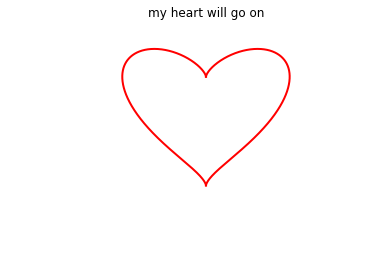

In [11]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import math


t = np.linspace(0, math.pi, 1000)
x = np.sin(t)
y = np.cos(t) + np.power(x, 2.0/3)
plt.plot(x, y, color='red', linewidth=2)
plt.plot(-x, y, color='red', linewidth=2)
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plt.axis('off')
plt.title("my heart will go on")
plt.show()